# Ford GoBike Data Exploration
## by Naine

## Table of Contents
- [I.Preliminary Wrangling](#wrangling)
- [II.Univariate Exploration](#univariate)
- [III.Bivariate Exploration](#bivariate)
- [IV.Multivariate Exploration](#multivariate)


<a id='wrangling'></a>
## I. Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The monthly data is provided by Bay Wheels and can be downloaded from [here](https://s3.amazonaws.com/baywheels-data/index.html). We can download 12 monthly data from January 2019 to December 2019 to make a full year coverage. The data files can be downloaded programmatically using the *Requests* library and then be joined together into a single file. Then we'll assess and clean the dataset and store the clean data for our analysis. To get started, let's import our libraries.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import glob
import datetime
import calendar
from zipfile import ZipFile
from io import BytesIO

%matplotlib inline

### 1. Gathering Data

In [ ]:
# urls for all 12 zip files
zip_urls = ['https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip']

# Make directory if it doesn't already exist
folder_name = 'gobike_monthly_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Download all files and unzip without saving the zip
for url in zip_urls:
    reponse = requests.get(url)
    zip_file = ZipFile(BytesIO(reponse.content))
    zip_file.extractall(folder_name)

In [ ]:
# Use glob to match the pattern ‘csv’
files = glob.glob(os.path.join(folder_name, '*.csv'))

# Combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in files], ignore_index=True, sort=False)

# Export to csv
combined_csv.to_csv('combined_csv.csv', index=False, encoding='utf-8-sig')

C:\Users\Shen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Shen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### 2. Assessing Data

In [ ]:
# Load data
gobike = pd.read_csv('combined_csv.csv')

C:\Users\Shen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# high-level overview of data shape and composition
print(gobike.shape)
print(gobike.dtypes)
gobike.head()

(2506983, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [ ]:
# descriptive statistics
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [ ]:
# Check values for categorical data
print(gobike.user_type.value_counts())
print(gobike.bike_share_for_all_trip.value_counts())
print(gobike.rental_access_method.value_counts())

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64
No     2203584
Yes     182561
Name: bike_share_for_all_trip, dtype: int64
app        108010
clipper     12828
Name: rental_access_method, dtype: int64


In [ ]:
gobike.isna().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     120838
rental_access_method       2386145
dtype: int64

In [ ]:
gobike.duration_sec.describe()

count    2.506983e+06
mean     8.076483e+02
std      1.974714e+03
min      6.000000e+01
25%      3.590000e+02
50%      5.710000e+02
75%      8.870000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

In [ ]:
print('max: ', gobike.duration_sec.max())
print('min: ', gobike.duration_sec.min())

max:  912110
min:  60


In [ ]:
gobike.query('duration_sec == 912110 or duration_sec == 60')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
1243352,60,2019-06-20 13:53:15,2019-06-20 13:54:15,NaN,NaN,37.336005,-121.885186,310.0,San Fernando St at 4th St,37.335885,-121.885660,190225,Subscriber,NaN,app
1244276,60,2019-06-10 20:44:27,2019-06-10 20:45:28,NaN,NaN,37.343533,-121.914918,NaN,NaN,37.343627,-121.914878,678749,Subscriber,NaN,clipper
1415832,60,2019-07-30 12:22:53,2019-07-30 12:23:54,NaN,NaN,37.318973,-121.949961,NaN,NaN,37.318999,-121.949974,979691,Customer,NaN,app
1415886,60,2019-07-30 16:46:30,2019-07-30 16:47:31,NaN,NaN,37.319925,-121.860458,NaN,NaN,37.319385,-121.859887,315020,Customer,NaN,app
1421086,60,2019-07-18 08:20:31,2019-07-18 08:21:31,317.0,San Salvador St at 9th St,37.333955,-121.877349,317.0,San Salvador St at 9th St,37.333955,-121.877349,376583,Subscriber,NaN,app
1421430,60,2019-07-07 19:25:24,2019-07-07 19:26:25,NaN,NaN,37.334594,-121.880532,NaN,NaN,37.334584,-121.880482,696908,Subscriber,NaN,app
1422436,60,2019-07-21 21:23:12,2019-07-21 21:24:12,NaN,NaN,37.335901,-121.887634,NaN,NaN,37.335924,-121.887621,141711,Customer,NaN,app
1438370,60,2019-07-23 20:15:54,2019-07-23 20:16:55,NaN,NaN,37.764956,-122.422367,NaN,NaN,37.764968,-122.422368,922106,Subscriber,NaN,app
1447573,60,2019-07-21 15:00:22,2019-07-21 15:01:23,NaN,NaN,37.772966,-122.450945,NaN,NaN,37.773024,-122.450924,197393,Subscriber,NaN,app
1447713,60,2019-07-25 07:25:29,2019-07-25 07:26:30,71.0,Broderick St at Oak St,37.773063,-122.439078,71.0,Broderick St at Oak St,37.773063,-122.439078,276438,Subscriber,NaN,app


**Observations:**
- start_time, end_time are object, should be datetime
- start_station_id, end_station_id are float, should be str
- bike_id is int, should be str
- user_type, bike_share_for_all_trip, rental_assess_method are object, should be category
- missing values in start_station_id, start_station_name, end_station_id, end_station_name, bike_share_for_all_trip, rental_access_method. But since we will not need those information for our analysis, just leave as is.  
- abnormal values: max duration_sec is 912110 seconds, min is 60 seconds. A bike ride for 60 seconds is probably too short. It's probably because users have changed their mind not to rent at that time. A bike ride of 912110 seconds(more than 10 days...)makes no sense. It's quite possible that the user forgot to log out or due to system bug.

### 3. Cleaning Data
The programmatic data cleaning process: Define, Code and Test

In [ ]:
# Make copy of the data
gobike_clean = gobike.copy()

#### Datatype issues:
- start_time, end_time are object, should be datetime
- start_station_id, end_station_id are float, should be str
- bike_id is int, should be str
- user_type, bike_share_for_all_trip, rental_assess_method are object, should be category

##### Define
- Use `pd.to_datetime` to convert *start_time, end_time* datatype to datetime.
- Use `astype(str)` to convert *start_station_id, end_station_id, bike_id* to str.
- Use `astype('category')` to convert *user_type, bike_share_for_all_trip, rental_access_method* datatype to category

##### Code

In [ ]:
# Use pd.to_datetime to convert datatype to datetime
gobike_clean.start_time = pd.to_datetime(gobike_clean.start_time)
gobike_clean.end_time = pd.to_datetime(gobike_clean.end_time)

# Use astype(str) to convert datatype to str
gobike_clean.start_station_id = gobike_clean.bike_id.astype(str)
gobike_clean.end_station_id = gobike_clean.bike_id.astype(str)
gobike_clean.bike_id = gobike_clean.bike_id.astype(str)

# Use astype('category') to set user type, bike_share_for_all_trip, rental_access_method to category
gobike_clean.user_type = gobike_clean.user_type.astype('category')
gobike_clean.bike_share_for_all_trip = gobike_clean.bike_share_for_all_trip.astype('category')
gobike_clean.rental_access_method = gobike_clean.rental_access_method.astype('category')

##### Test

In [ ]:
gobike_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
bike_share_for_all_trip          category
rental_access_method             category
dtype: object

**abnormal value in duration_sec:**
<br>max duration_sec is 912,110 seconds, min is 60 seconds. A bike ride for 60 seconds is probably too short. It's possible that users have changed their mind not to rent at that time. A bike ride of 912,110 seconds(more than 10 days...)makes no sense. It's quite possible that user forgot to log out or due to system bug.

##### Define
filter and remove abnormal values. remove duration_sec of 60 seconds and 912110 seconds.

##### Code

In [ ]:
gobike_clean = gobike_clean[gobike_clean.duration_sec != 912110]
gobike_clean = gobike_clean[gobike_clean.duration_sec != 60]

##### Test

In [ ]:
gobike_clean.duration_sec.describe()

count    2.506944e+06
mean     8.072962e+02
std      1.888989e+03
min      6.100000e+01
25%      3.590000e+02
50%      5.710000e+02
75%      8.870000e+02
max      8.623000e+04
Name: duration_sec, dtype: float64

### 4. Store and Load Clean Data

In [ ]:
# Store the clean data in a CSV file
gobike_clean.to_csv('combined_clean.csv', index = False)

# load data to a dataframe
df = pd.read_csv('combined_clean.csv')

### What is the structure of your dataset?

There are 2,506,944(after removing abnormal duration_sec values) bike rides dated from January 2019 to December 2019 in the dataset with 15 features(duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, bike_share_for_all_trip, rental_access_method).

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in the following topics: When are most trips taken in terms
of time of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

This dataset does not contain many numeric variables for my analysis purpose. But since the dataset has start_time information. I can extract hour, day and month information from this column and do analysis for bike usage in terms of hour, day and month.

<a id='univariate'></a>
## II. Univariate Exploration

Let's first look at duration_sec which is the duration in seconds of a bike trip.

#### 1.  duration_sec

In [ ]:
# Descriptive statistics
print('median:', df.duration_sec.median())
print(df.duration_sec.describe())

median: 571.0
count    2.506944e+06
mean     8.072962e+02
std      1.888989e+03
min      6.100000e+01
25%      3.590000e+02
50%      5.710000e+02
75%      8.870000e+02
max      8.623000e+04
Name: duration_sec, dtype: float64


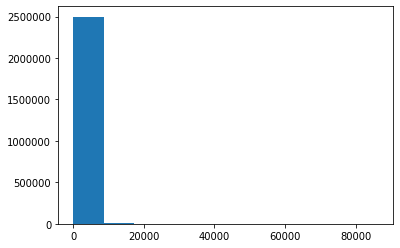

In [ ]:
# Histogram
plt.hist(data = df, x = 'duration_sec');

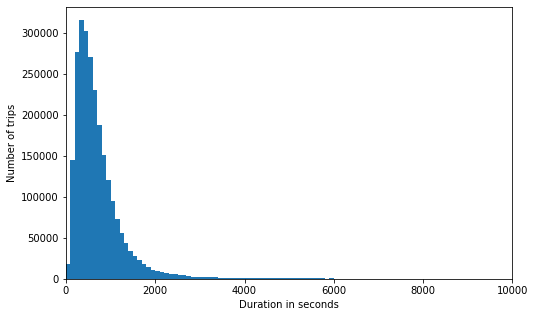

In [ ]:
# Adjust the bean and set limit to x
binsize = 100
bin_edges = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bin_edges)
plt.xlabel('Duration in seconds')
plt.ylabel('Number of trips')
plt.xlim(0,10000) # set up a limit due to the outliers
plt.show()

In [ ]:
# select high outliers, using criteria eyeballed from the plots
high_outliers = ((df['duration_sec'] > 6000))
print(high_outliers.sum())

14590


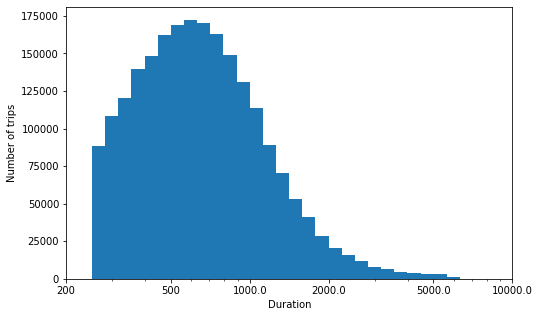

In [ ]:
# There's a long-tail in the distribution, filter for duration < 6000 to remove outliers
# and and plot on a log scale instead

duration_filter = df.query('duration_sec < 6000')
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(duration_filter['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8,5])
plt.hist(data = duration_filter, x = 'duration_sec', bins = bins)
plt.xscale('log')
tick_locs = [200, 500, 1e3, 2e3, 5e3, 1e4] #Set ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Duration')
plt.ylabel('Number of trips')
plt.show()

**Observations:**
The first graph is not informative at all probably due to outliers. By setting up a value limit of 10000 seconds for x and plot a second graph, we can see that duration_sec has a very long-tailed distribution, with a lot of bike rides on the short duration end, and few on the long duration end. Outliers at the high end skewed the data. I filtered for duration less than 6000 seconds and plotted on a log-scale. From this graph we can see that the peak is less than 550 seconds.

Next, let's look at another variable of interest: start_time

#### 2. start_time
I'm interested in the number of trips in terms of time of day, day of the week, and month of the year. So I need to extract those information from start_time column and create separate columns just for analysis purpose.

In [ ]:
# Create month, dayofweek, hour columns for start date
df['start_month'] = pd.DatetimeIndex(df['start_time']).month
df['start_dayofweek'] = pd.DatetimeIndex(df['start_time']).dayofweek
df['start_hour'] = pd.DatetimeIndex(df['start_time']).hour

# Transform month number to abbrieviated month name, dayofweek number to day name
df['start_month'] = df['start_month'].apply(lambda x: calendar.month_abbr[x])
df['start_dayofweek'] = df['start_dayofweek'].apply(lambda x: calendar.day_abbr[x])

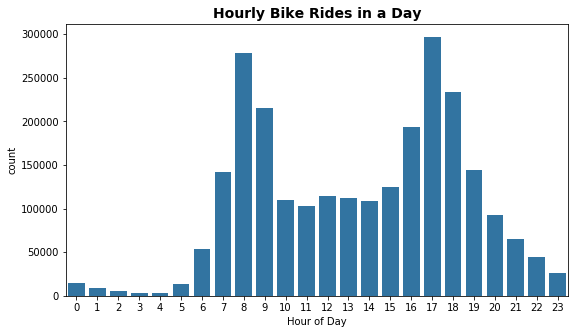

In [ ]:
# number of bike trips in an hour
plt.figure(figsize=(9,5))
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='start_hour', color=base_color)
plt.title('Hourly Bike Rides in a Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day');

**Obervations:**
The hourly distribution looks roughly bimodal, with one peak around 8am and second peak around 5pm. Daily usage rises from 4am and reaches the peak at 8am and decreases dramatically after 9am. Between 10am-2pm, bike usage around 12-1pm is slightly higher. Then from 3pm bike rent demand increases and reaches the second peak around 5pm, then it starts to decrease again. The rent service is heavily used during commute hours.

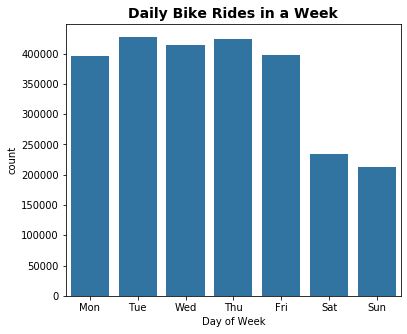

In [ ]:
# number of bike trips in a day
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(6,5))
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='start_dayofweek', color=base_color, order=order)
plt.title('Daily Bike Rides in a Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week');

**Obervations:**
The bikes are used more on weekdays than on weekend. Most of the users are daily commuters who use the service to work/school on weekdays and less on weekend for leisure.

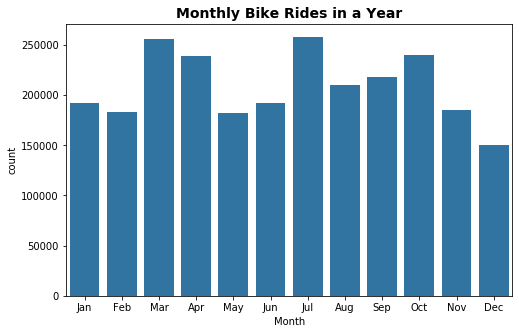

In [ ]:
# number of bike trips in a month
plt.figure(figsize=(8,5))
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='start_month', color=base_color)
plt.title('Monthly Bike Rides in a Year', fontsize=14, fontweight='bold')
plt.xlabel('Month');

**Observations:**
March and July are the two most popular months for bike use, followed by April and July. December is the least. The bike usage is affected by season. The bike service is in high demand in spring and summer when the weather is warm, and least demand in winter due to cold weather.
<br>
<br> Now let's move on to another variable of interest: user_type.
#### 3. user_type

In [ ]:
print(df.user_type.value_counts())
print()
print(df.user_type.value_counts(normalize=True))

Subscriber    2021136
Customer       485808
Name: user_type, dtype: int64

Subscriber    0.806215
Customer      0.193785
Name: user_type, dtype: float64


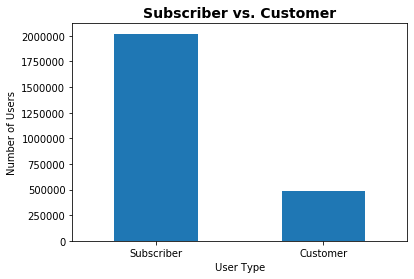

In [ ]:
# Plot bar chart based on number of counts
plt.figure(figsize=[6,4])
df.user_type.value_counts().plot(kind='bar')
plt.title('Subscriber vs. Customer', fontsize=14, fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0);

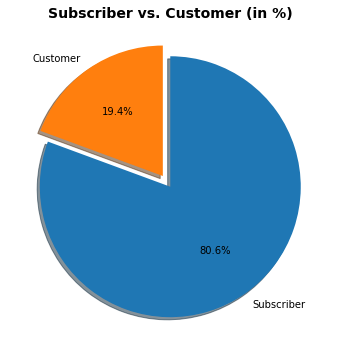

In [ ]:
# Plot bar chart in %
plt.figure(figsize=[8,6])
explode = (0, 0.1)
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, explode=explode, labels = sorted_counts.index,
        autopct='%1.1f%%',shadow=True, startangle = 90,counterclock = False)
plt.title('Subscriber vs. Customer (in %)', fontsize=14, fontweight='bold');

**Obervations:** Majority of bike users are subscribers(80.6%). Customer is 19.4% for those who are not subscribers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The first plot of distribution for duration is not informative at all due to outliers at the long end. By setting up a value limit, the second plot looks better. But it was still highly skewed with most bike rides on the short duration end, and few on the long duration end. I filtered duration for rides less than 6000 seconds(eyeballed from the plots) and plotted on a log-scale. From this graph we can see that the peak is a little less than 550 seconds, suggesting that most of the bike rides are around 550 seconds.

In order to find out usage pattern in terms of time of day, day of the week and month of the year, I need to plot bike usage for each of the above mentioned variables. However, those data are not provided separately. They're all part of start_time. I had to extract month, day and hour information from start_time and put into separate columns to for analysis purpose.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I had to apply scale transformation to the distribution of trip duration. The data looks highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will looks more like a normal distribution.

<a id='bivariate'></a>
## III. Bivariate Exploration

In this section, I'll investigate relationship between pairs of variables. Let's first check how the trip duration varies between different user types.

#### 1. duration_sec vs. user_type

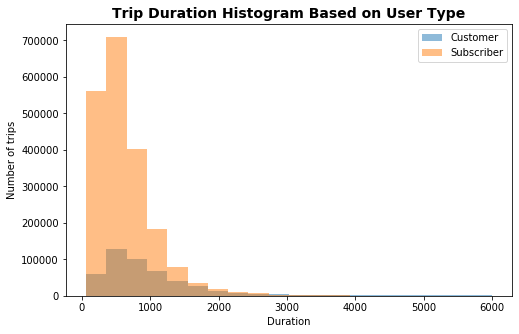

In [ ]:
plt.figure(figsize = [8, 5])
filter_data = df.query('duration_sec < 6000')
filter_data.query('user_type =="Customer"').duration_sec.hist(alpha=0.5, bins=20, label='Customer')
filter_data.query('user_type =="Subscriber"').duration_sec.hist(alpha=0.5, bins=20, label='Subscriber')
plt.grid(False)
plt.title('Trip Duration Histogram Based on User Type', fontsize=14, fontweight='bold')
plt.xlabel('Duration')
plt.ylabel('Number of trips')
plt.legend();

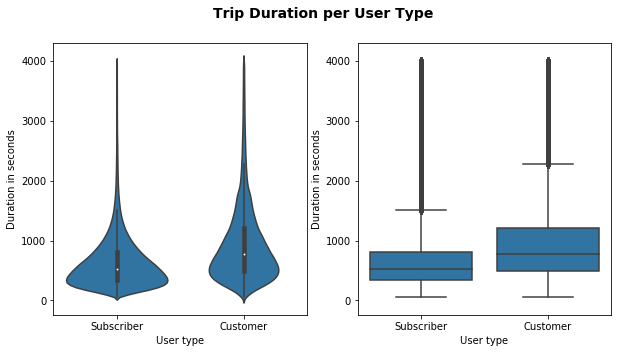

In [ ]:
# Set an upper limit of 4000 to remove outliers for the graphs
fig = plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]
filter_data = df.query('duration_sec < 4000')

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = filter_data, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User type')
plt.ylabel('Duration in seconds')

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = filter_data, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User type')
plt.ylabel('Duration in seconds')
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
fig.suptitle('Trip Duration per User Type', fontsize=14, fontweight='bold')
plt.show();

In [ ]:
# Average trip duration for different user types
# Set an upper limit of 6000
print(df.query('duration_sec < 6000').groupby('user_type').duration_sec.mean())

user_type
Customer      1012.508877
Subscriber     641.112815
Name: duration_sec, dtype: float64


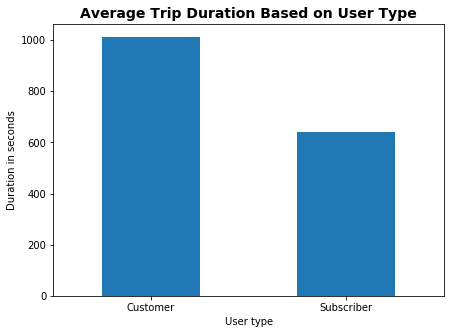

In [ ]:
# Set an upper limit of 6000
df.query('duration_sec < 6000').groupby('user_type')['duration_sec'].mean().plot(kind='bar', figsize=(7,5))
plt.title('Average Trip Duration Based on User Type', fontsize=14, fontweight='bold')
plt.xlabel('User type')
plt.ylabel('Duration in seconds')
plt.xticks(rotation=0);

**Observations:** We can see that although subscribers make a lot more trips than customers, customers generally take longer bike trip than subscribers.

We did a general look at how many rides were taken for different period of time in an earlier visual, now we'll look at the average durations of those rides per hour/day/month.

#### 2. duration_sec vs. start_hour, start_dayofweek, start_month

Let's plot to look at:
- avg. trip duration of an hour
- avg. trip duration of a day
- avg. trip duration of a month

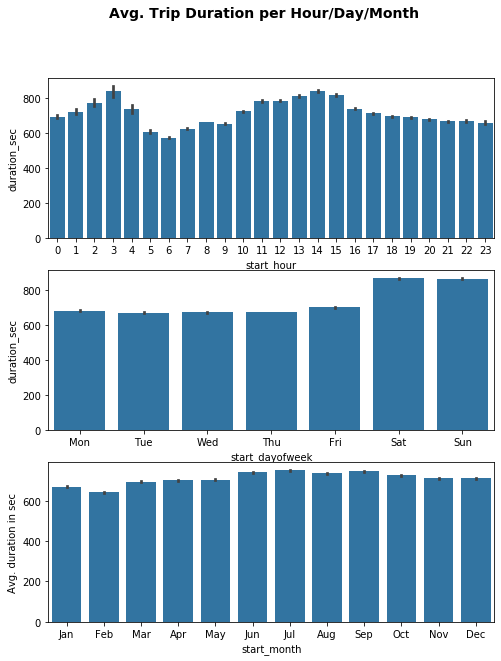

In [ ]:
# let's plot duration mean for all three together
fig, ax = plt.subplots(nrows=3, figsize = [8,10])
base_color = sns.color_palette()[0]

# hour
sns.barplot(data = df.query('duration_sec <6000'), x = 'start_hour', y = 'duration_sec',
            color = base_color,ax = ax[0])
plt.ylabel('Avg. duration in sec')

# day of week
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.barplot(data = df.query('duration_sec < 6000'), x = 'start_dayofweek', y = 'duration_sec',
            color = base_color, ax = ax[1], order=order)
plt.ylabel('Avg. duration in sec')

# month
sns.barplot(data = df.query('duration_sec < 6000'), x = 'start_month', y = 'duration_sec',
            color = base_color, ax = ax[2])
plt.ylabel('Avg. duration in sec')
fig.suptitle('Avg. Trip Duration per Hour/Day/Month', fontsize=14, fontweight='bold')
plt.show()

Average trip duration by month looks relatively constant throughout the year in the above graph, but let's take a closer look by applying pointplot(note that 0 is not the baseline)

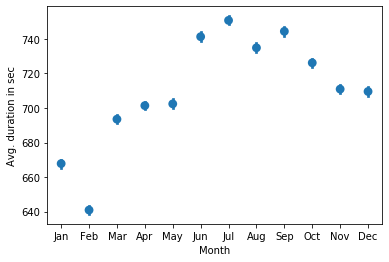

In [ ]:
base_color = sns.color_palette()[0]
sns.pointplot(data = df.query('duration_sec < 6000'), x = 'start_month', y = 'duration_sec', color = base_color, linestyles = "")
plt.xlabel('Month')
plt.ylabel('Avg. duration in sec');

**Observation:**
Average ride duration in an hour increases from midnight and reaches the peak at 3am. It's kind of unexpected to see a peak at 3am in the morning though. Then it decreases and rises again from 5am and reach another peak at 2pm with gradual decrease after that until mid-night. Average trip duration during the weekend is longer than that of the weekdays. Average trip duration on Friday is relatively longer than other weekdays. It's easy to understand since people tend to take short trip during workdays, and longer trips during the weekend for leisure purposes. For monthly average, the longer bike trips seem to take place in the summer months whereas rides were shorter in those more winter months with January and Febuary the lowest due to the season. It's cold and windy in the winter and people tend to take shorter trips.

I'm curious about how user type affects bike usage(in number of rides). Up next, let's look at relationship between user type and number of bike rides in terms of time of day, day of the week, and month of the year.

#### 3. user_type vs. start_hour, start_dayofweek, start_month

To depict the relationship between two categorical variables, we can use clustered bar chart. I'll first check when are most trips taken in day.

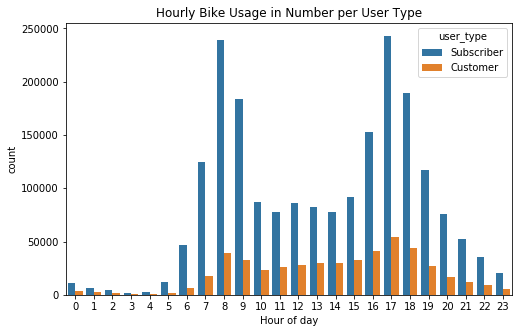

In [ ]:
# Number of bike rides per hour per user type
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'start_hour', hue = 'user_type')
plt.xlabel('Hour of day')
plt.title('Hourly Bike Usage in Number per User Type');

**Observations:**
The daily trend reveals that subscribers have substantial more bike rides than customers and both types look bimodal. But since the two types were plotted on the same scale, it's hard to interpret more about customers. Let's facet to plot the two groups again separately on different scale.

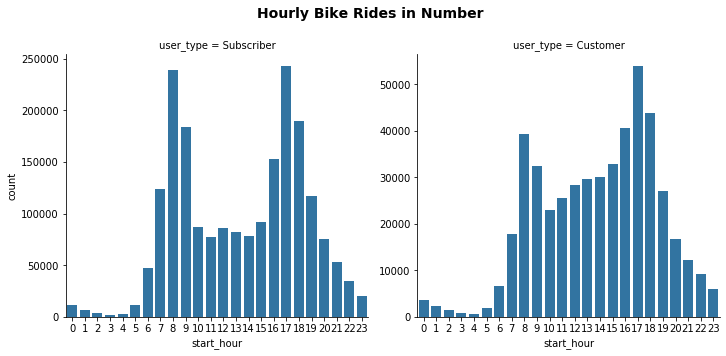

In [ ]:
# Use Facet & catplot to plot subscribers and customers on different scale, https://seaborn.pydata.org/generated/seaborn.catplot.html
base_color = sns.color_palette()[0]
sns.catplot(data=df, x='start_hour', col='user_type', kind='count', color=base_color, sharey = False)
plt.subplots_adjust(top=0.85)
plt.suptitle('Hourly Bike Rides in Number', fontsize=14, fontweight='bold');

**Observations:**
Now we can clearly see that subscribers take most of their trips around 7-9am and 4-6pm, typical commute hours to go to work/school and come back home after work/school. There are less bike rides during 10am-3pm. For customers, 8am-6pm is the popular time period to rent the bike.  Bike usage for customers has one peak at 5pm and another peak at 8am, which is much less than the peak at 5pm. Customers are more likely to be tourist or occasional riders.

Next, I'm going to check when are most trips taken in terms of week.

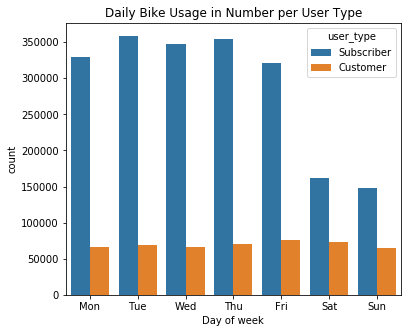

In [ ]:
# Number of bike rides per day per user type
plt.figure(figsize = (6, 5))
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(data = df, x = 'start_dayofweek', hue = 'user_type', order=order)
plt.xlabel('Day of week')
plt.title('Daily Bike Usage in Number per User Type');

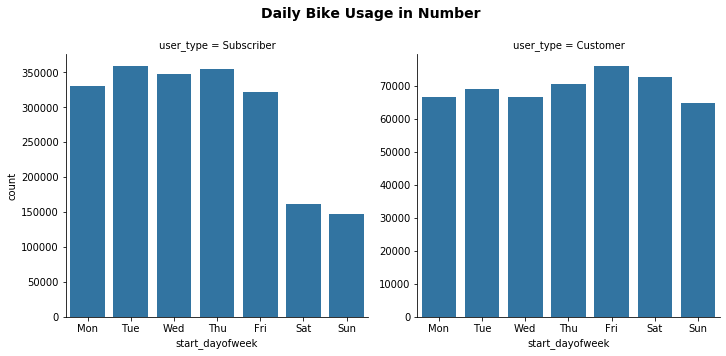

In [ ]:
# Use Facet & catplot to plot subscribers and customers on different scale, https://seaborn.pydata.org/generated/seaborn.catplot.html
base_color = sns.color_palette()[0]
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df, x='start_dayofweek', col='user_type', kind='count', order=order, color=base_color, sharey = False)
plt.subplots_adjust(top=0.85)
plt.suptitle('Daily Bike Usage in Number', fontsize=14, fontweight='bold');

**Observations:**
Subscribers took more trips during the weekdays and less on weekend probably because they use the bikes more to commute to work/school. The distribution of usage for customer looks relatively constant over the week, with Friday and Saturday higher than other days probably because they are occasional riders.

Next, I'm going to check when are most trips taken in terms of week.

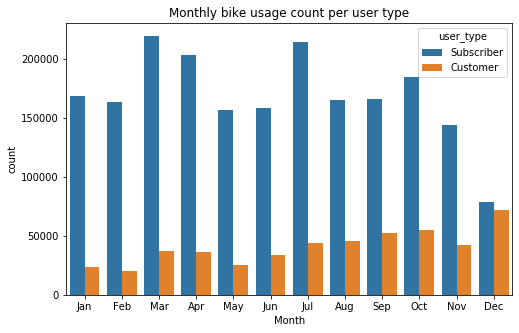

In [ ]:
# Number of bike rides per month per user type
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'start_month', hue = 'user_type')
plt.xlabel('Month')
plt.title('Monthly bike usage count per user type');

**Observations:**
For subscribers, March and July are the two most popular months for bike use, and December is the least, suggeting that bike usage is affected by season. More trips are taken during spring and summer, less in the winter due to cold weather. Subscribers are mostly daily commuters, who take less rides during holiday seasons. Customers, on the other hand, who are tourist and occasional riders, take the most rides in December due to the holidays. Spring and summer are popular months for customers too.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- By comparing average trip duration for subscribers and customers, we found that although subscribers make a lot more trips than customers, customers generally take longer bike trip than subscribers. Many commuters use the service for occasional short trips or to get to public transportation stops.
- Daily average trip duration during the weekend is longer than that of the weekdays. For monthly average, the longer bike trips seem to take place in the summer months whereas rides were shorter in those more winter months with January and Febuary the lowest due to the season. It's cold and windy in the winter and people tend to take shorter trips.
- Different user types does show different usage(in number of rides) patterns. Subscribers take most of their trips around 7-9am and 4-6pm, typical commute hours to go to work/school and come back home after work/school. For customers, 8am-6pm is the popular time period to rent the bike. Bike usage for customers has one peak at 5pm and another peak at 8am, which is much less than the peak at 5pm. Subscribers took more trips during the weekdays and less on weekend. The usage trend for customers is relatively constant during the week but with higher usage on Friday and Sunday. The bike usage(in numer of rides) of both user type are affected by season. But usage for customers peaks in December, whereas for subscribers it is the opposite. Customers are probably tourist and occasional riders, who take the most rides in December due to the holidays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It's surprising to see that the average ride duration in an hour increases from midnight and reaches the peak at 3am in the morning. When both user types are combined, we see that bikes are used more on weekdays than on weekend as we've discussed in the univariate exploration section earlier. By separating usage for different user groups, we observed that the usage in number of bike rides and average duration are different for the two user groups.

<a id='multivariate'></a>
## IV. Multivariate Exploration

The main thing I want to explore in this part of analysis is wheather bike trip durations and frequency depends on if a user is a subscriber or customer. Let's dive deeper to investigate the data by creating plots of multiple variables.
Let's first look at average bike ride duration for different usertype.

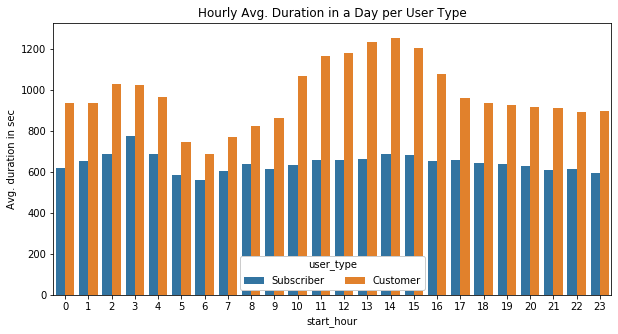

In [ ]:
# Two categorical variables and one numeric variable: clustered bar chart using the barplot function
# use "hue" parameter to add a categorical third variable
plt.figure(figsize = (10, 5))
ax = sns.barplot(data = df.query('duration_sec < 6000'), x = 'start_hour', y = 'duration_sec', hue = 'user_type', errwidth = 0)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')
plt.ylabel('Avg. duration in sec')
plt.title('Hourly Avg. Duration in a Day per User Type');

**Observations:**
Hourly avg. duration for customers are longer than subscribers. The graph above demonstrates similar pattern for both subscribers and customers. But average duration for customers are higher between 10am-5pm reaching its peak at 2pm.

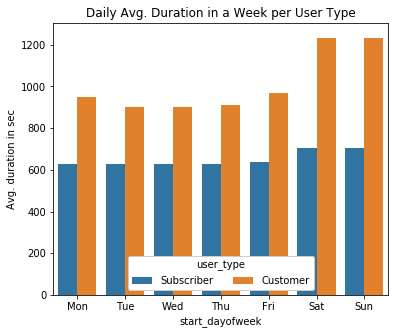

In [ ]:
plt.figure(figsize = (6, 5))
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sns.barplot(data = df.query('duration_sec < 6000'), x = 'start_dayofweek', y = 'duration_sec', hue = 'user_type',
                 errwidth = 0, order=order)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')
plt.ylabel('Avg. duration in sec')
plt.title('Daily Avg. Duration in a Week per User Type');

**Observations:**
Daily avg. trip duration for customers are longer than subscribers. The weekly pattern is similar for both user type. Both subscribers and customers take longer trips during weekend than weekdays. Customers take longer trips during the weekend.

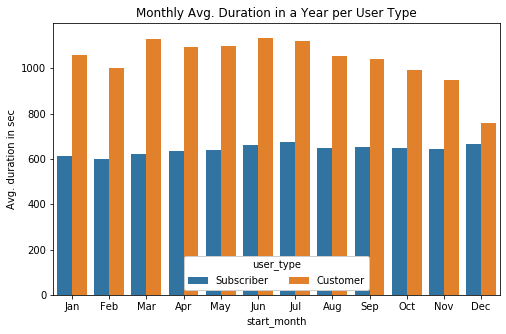

In [ ]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(data = df.query('duration_sec < 6000'), x = 'start_month', y = 'duration_sec', hue = 'user_type', errwidth = 0)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')
plt.ylabel('Avg. duration in sec')
plt.title('Monthly Avg. Duration in a Year per User Type');

**Observations:**
Monthly avg. trip duration for customers are longer than subscribers. Monthly average duration for subscribers looks stable during the year. The average duration for customers peaks at March and bottom at December.

Up next, let's look at the average duration hourly in a week for both user types.

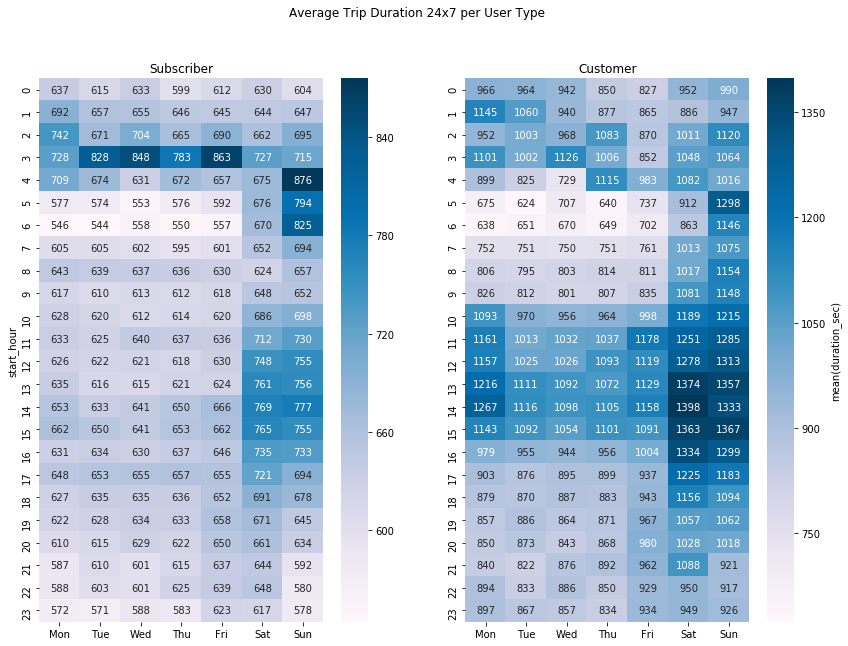

In [ ]:
# Average trip duration for 24x7
# Setting the weekday order, https://stackoverflow.com/questions/35193808/re-order-pandas-series-on-weekday
# https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
plt.figure(figsize=(14,10))
df['start_dayofweek'] = pd.Categorical(df['start_dayofweek'],
                                       categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ordered=True)
filter_data = df.query('duration_sec < 6000')

# left plot: subscriber
plt.subplot(1, 2, 1)
duration_means_s = filter_data.query('user_type == "Subscriber"').groupby(['start_dayofweek',
                                                                           'start_hour']).mean().astype(int)['duration_sec']
duration_means_s = duration_means_s.reset_index(name = 'duration_sec_avg')
duration_means_s = duration_means_s.pivot(index = 'start_hour', columns = 'start_dayofweek',
                                      values = 'duration_sec_avg')
ax1 = sns.heatmap(duration_means_s, cmap ='PuBu', annot=True, fmt='g', annot_kws={"size": 10})
plt.xlabel('')
plt.title('Subscriber')
ax1.set_ylim(23.5 + 0.5, 0.5 - 0.5)  #ax1.get_ylim() -- (23.5, 0.5)
#https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

# right plot: customer
plt.subplot(1, 2, 2)
duration_means_c = filter_data.query('user_type == "Customer"').groupby(['start_dayofweek',
                                                                         'start_hour']).mean().astype(int)['duration_sec']
duration_means_c = duration_means_c.reset_index(name = 'duration_sec_avg')
duration_means_c = duration_means_c.pivot(index = 'start_hour', columns = 'start_dayofweek',
                                      values = 'duration_sec_avg')
ax2 = sns.heatmap(duration_means_c, cmap ='PuBu', annot=True, fmt='g',
            cbar_kws = {'label' : 'mean(duration_sec)'}, annot_kws={"size": 10})
plt.xlabel('')
plt.ylabel('')
plt.title('Customer')
plt.suptitle('Average Trip Duration 24x7 per User Type')
plt.ylim(ax1.get_ylim());    # set y-axis limits to be same as left plot

**Observations:**
- Again, it's clear to see that customers take longer trips than subscribers in general. Subscribers take short trips during the weekday and longer rides during the weekend. During the weekend, they tend to make longer rides from 10am to 5pm, with noon to early afternoon when most long trips happened.
- Similarly, customers take longer trips at weekend than weekdays but they are not as sensitive to weekdays as subscribers. They tend to take longer trips from 10am to 4pm during the week.
- In the bivariate exploration section, we were surprised to see that the hourly average duration increases from midnight and reaches the peak at 3am in the morning. By plot heatmap for serparate user groups, we see large average duration means on Tuesday to Friday 3am and 4-6am Sunday for subscribers. There are some large duraion means occured on Monday to Thursday before 4am and some on weekend before 5am.

Let's plot another heatmap to see when are most bike rides take place in hour of day in a whole week for different user types.

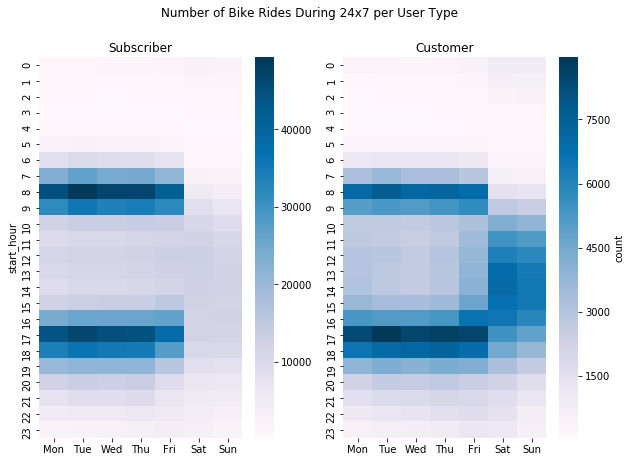

In [ ]:
# Number of bike rides taken place during 24x7
plt.figure(figsize=(10,7))
df['start_dayofweek'] = pd.Categorical(df['start_dayofweek'],
                                       categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ordered=True)
filter_data = df.query('duration_sec < 6000')

# left plot: subscriber
plt.subplot(1, 2, 1)
rides_count_s = filter_data.query('user_type == "Subscriber"').groupby(['start_dayofweek',
                                                                           'start_hour']).size().astype(int)
rides_count_s = rides_count_s.reset_index(name = 'count')
rides_count_s = rides_count_s.pivot(index = 'start_hour', columns = 'start_dayofweek',
                                      values = 'count')
ax1 = sns.heatmap(rides_count_s, cmap ='PuBu')
plt.xlabel('')
plt.title('Subscriber')
ax1.set_ylim(23.5 + 0.5, 0.5 - 0.5)  #ax1.get_ylim() -- (23.5, 0.5)

# right plot: customer
plt.subplot(1, 2, 2)
rides_count_c = filter_data.query('user_type == "Customer"').groupby(['start_dayofweek',
                                                                         'start_hour']).size().astype(int)
rides_count_c = rides_count_c.reset_index(name = 'count')
rides_count_c = rides_count_c.pivot(index = 'start_hour', columns = 'start_dayofweek',
                                      values = 'count')
ax2 = sns.heatmap(rides_count_c, cmap ='PuBu', cbar_kws = {'label' : 'count'})
plt.xlabel('')
plt.ylabel('')
plt.title('Customer')
plt.suptitle('Number of Bike Rides During 24x7 per User Type')
plt.ylim(ax1.get_ylim());    # set y-axis limits to be same as left plot

**Observations:** The heatmap for different user types strengthened the results we've discussed eariler in the bivariate exploration section. Different user types does show different usage(in number of rides) patterns. Subscribers take most of their trips during weekdays around 7-9am(peak at 8am) and 4-6pm(peak at 5pm), typical commute hours to go to work/school and come back home after work/school. For customers, 8am-6pm is the popular time period to rent the bike. Bike usage for customers has one peak at 5pm and another peak at 8am, which is much less than the peak at 5pm. The usage trend for customers is relatively constant during the week but with higher usage on the weekend.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

This part of analysis strengthened many facts that we've discovered in our earlier analysis. Average ride duration in hour, day and month all confirm that customers take longer trips than subscribers. Both subscribers and customers take longer trips during weekend than weekdays. Houly average duration for customers are higher between 10am-5pm reaching its peak at 2pm. The monthly average duration for subscribers looks stable during the year. The average duration for customers peaks at March and bottom at December. Subscribers take most of their trips during weekdays around 7-9am(peak at 8am) and 4-6pm(peak at 5pm) which is typical commute hours. For customers, 8am-6pm is the popular time period to rent the bike. Bike usage for customers has one peak at 5pm and another peak at 8am, which is much less than the peak at 5pm. The usage trend for customers is relatively constant during the week but with higher usage on the weekend.

### Were there any interesting or surprising interactions between features?
In the bivariate exploration section, we were surprised to see that the hourly average duration increases from midnight and reaches the peak at 3am in the morning. By plot heatmap for serparate user groups, we see large average duration means on Tuesday to Friday 3am and 4-6am Sunday for subscribers. There are some large duraion means occured on Monday to Thursday before 4am and some on weekend before 5am.

## References:

Udacity Data Analyst Nanodegree 5.Data Visualization course materials & Example_Project_Diamonds
<br>https://thispointer.com/python-how-to-unzip-a-file-extract-single-multiple-or-all-files-from-a-zip-archive/
<br>https://svaderia.github.io/articles/downloading-and-unzipping-a-zipfile/
<br>https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/
<br>https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas
<br>https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int
<br>https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
<br>https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
<br>https://stackoverflow.com/questions/53548973/remove-background-plot-lines-in-pyplot-hist
<br>https://seaborn.pydata.org/generated/seaborn.catplot.html
<br>https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
<br>https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
<br>https://stackoverflow.com/questions/35193808/re-order-pandas-series-on-weekday
<br>https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
<br>https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby